In [13]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, cifar10
from keras.preprocessing.image import ImageDataGenerator

In [14]:
 # rescale images and set aside 20% of data for validation
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2) 

# Load MNIST and CIFAR-10 datasets
(train_images_mnist, train_labels_mnist), (test_images_mnist, test_labels_mnist) = mnist.load_data()
(train_images_cifar10, train_labels_cifar10), (test_images_cifar10, test_labels_cifar10) = cifar10.load_data()

# Train generator: Look into the train directory and generate batches of data
# No desire to wrestle with the format of the validation dataset, so splitting the training data
train_gen = data_gen.flow_from_directory(
    '/home/robert/Dev/cs5870-assignment-1/data/tiny-imagenet-200/train',
    target_size=(64, 64),  # Resize to the actual image size
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify this is for training data
)

# Validation generator: Similarly, for validation
val_gen = data_gen.flow_from_directory(
    '/home/robert/Dev/cs5870-assignment-1/data/tiny-imagenet-200/train',
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify this is for validation data
)

Found 80000 images belonging to 200 classes.
Found 20000 images belonging to 200 classes.


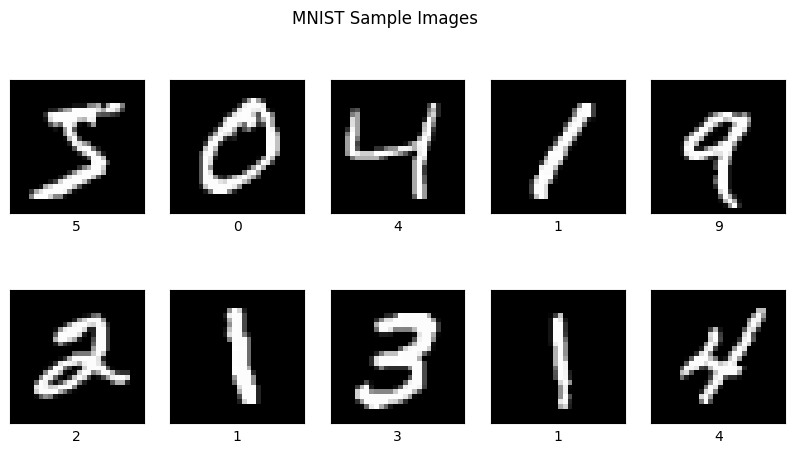

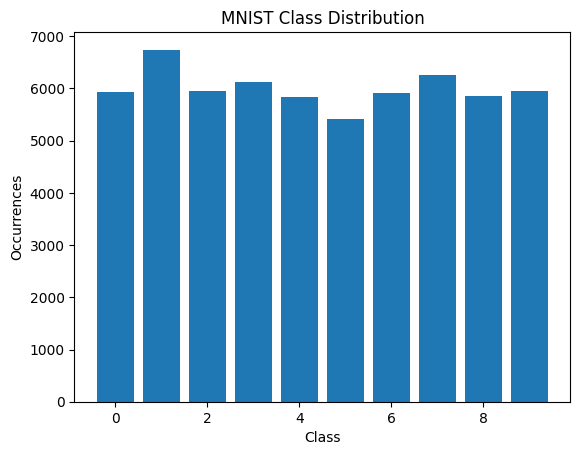

In [15]:
# Display some random images from MNIST
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_mnist[i], cmap='gray')
    plt.xlabel(str(train_labels_mnist[i]))
plt.suptitle('MNIST Sample Images')
plt.show()

# Display class distribution for MNIST
unique, counts = np.unique(train_labels_mnist, return_counts=True)
plt.bar(unique, counts)
plt.title('MNIST Class Distribution')
plt.xlabel('Class')
plt.ylabel('Occurrences')
plt.show()

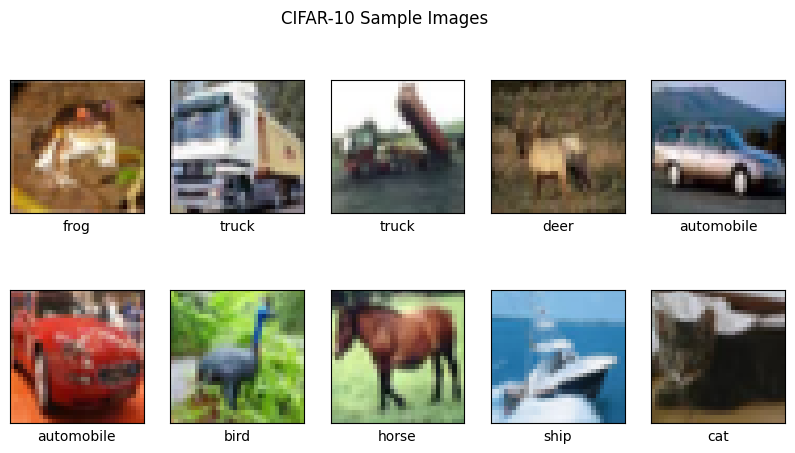

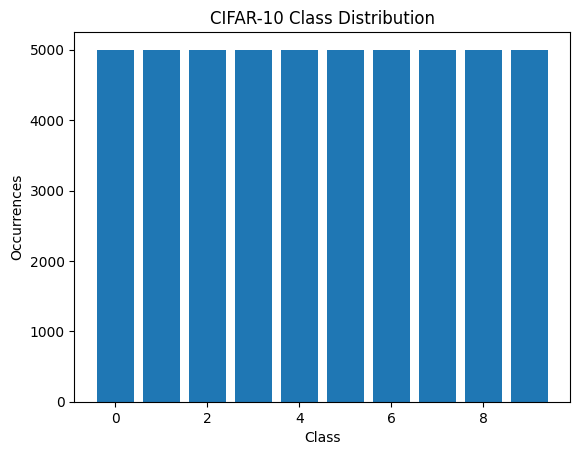

In [16]:
# Tie class numbers to class names for Cifar-10
cifar10_class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

# Display some random images from MNIST
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_cifar10[i])
    label_index = train_labels_cifar10[i][0]  # Get the integer label
    plt.xlabel(cifar10_class_names[label_index])  # Translate to class name
plt.suptitle('CIFAR-10 Sample Images')
plt.show()

# Display class distribution for MNIST
unique, counts = np.unique(train_labels_cifar10, return_counts=True)
plt.bar(unique, counts)
plt.title('CIFAR-10 Class Distribution')
plt.xlabel('Class')
plt.ylabel('Occurrences')
plt.show()

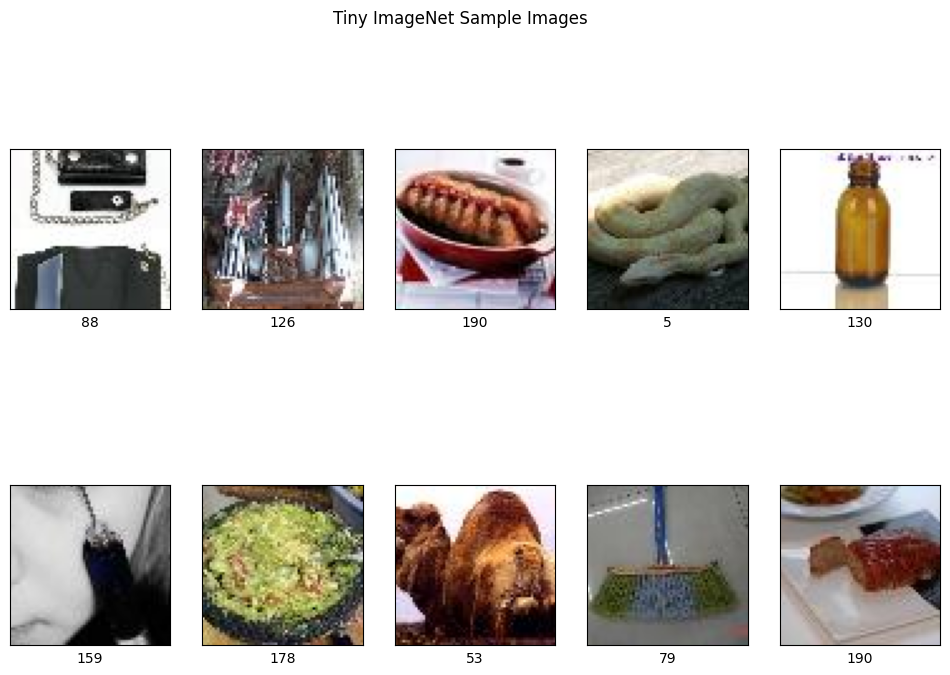

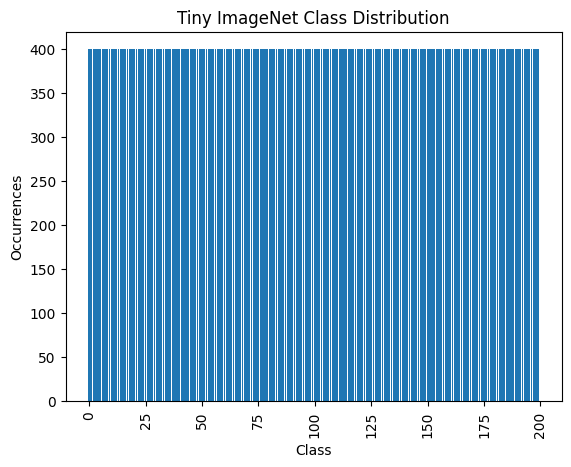

In [17]:
# Fetch a batch of images and labels
images, labels = next(train_gen)

# Tiny ImageNet doesn't provide class names, so you'd typically have to define or fetch them.
# For simplicity, in this example, we'll just use label indices as they're returned by the generator.
# If you had a list of class names, you could use that here.

plt.figure(figsize=(12, 8))
for i in range(10):  # Let's plot first 10 images from the batch
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    
    # Find the index of the label from one-hot encoded labels
    label_index = np.argmax(labels[i])
    plt.xlabel(label_index)
    
plt.suptitle('Tiny ImageNet Sample Images')
plt.show()

# Get labels from the generator
labels = train_gen.labels

# Compute class distribution
unique, counts = np.unique(labels, return_counts=True)

# Plot
plt.bar(unique, counts)
plt.title('Tiny ImageNet Class Distribution')
plt.xlabel('Class')
plt.ylabel('Occurrences')
plt.xticks(rotation=90)  # Rotate class names for better visibility if they're too clustered
plt.show()